# Build Experimental Dataset Notebook

## Purpose and Context

This notebook gets the experimental data we already have in a usable format for us to do predictions on to compare to the actual values we found in our experiments

## Setup

import libraries

In [14]:
pip install IPython


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Ipyth (from versions: none)
ERROR: No matching distribution found for Ipyth


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import utils
import features

import tqdm.notebook
tqdm.notebook.tqdm_notebook.pandas()

ModuleNotFoundError: No module named 'IPyth'

## Load Data

In [1]:
data = pd.read_csv('../rawData/Experimental_SMILES_Predictions.csv')

data.rename(columns = {'SMILES': 'Smiles', 'Min ε': 'Min Epsilon', 'Max ε': 'Max Epsilon', 'Dye': 'Source Key', 'TD-DFT μ (D)': 'TD-DFT (Debye)'}, inplace = True)

data = data[['Source Key', 'TD-DFT (Debye)', 'Min Epsilon', 'Max Epsilon', 'Smiles']]
data

NameError: name 'pd' is not defined

## Compute Features

In [4]:
data = data.join(data['Smiles'].progress_apply(features.ComputeAllFeatures).apply(lambda x: pd.Series(x, dtype = 'object'))).fillna(0)

AttributeError: 'Series' object has no attribute 'progress_apply'

### Saving for later use

In [5]:
# Standardizing Column names
data.columns = data.columns.str.replace('_', ' ').str.title()

# Compressing data
utils.ConvertFloatColumnsToIntegerIfNoDataLoss(data)
utils.CompressIntegerColumns(data)

### Cleaning up data

In [6]:
data.drop(['Smiles', 'Inchikey'], axis = 'columns', inplace = True)
data.head(1)

KeyError: "['Inchikey'] not found in axis"

In [ ]:
utils.RemoveStaticColumns(data)
print('-----------------')
print('-----------------')
print('-----------------')
utils.RemoveDuplicateColumns(data)

## Basic Analysis

In [ ]:
data.info()

In [7]:
utils.InspectColumnValues(data)

Source Key: 10
['Cy3' 'Cy5-hex' 'Cy5-Peg' 'Cy7' 'Cy5.5' 'Cy5-tBu' 'Cy5' 'Cy5-Cl'
 'Cy5-NMe2' 'Cy5-CN']

Td-Dft (Debye): 10
[12.25 16.22 16.19 17.62 15.57 15.9  15.35 15.74 15.83 15.66]

Min Epsilon: 9
[136000.    200900.    209500.    199000.    198000.    249300.
 218810.982 269300.           nan]

Max Epsilon: 7
[150000. 219800. 221400. 250000. 261100. 288400.     nan]

Smiles: 10
['CN4/C(=C/C=C/C2=[N+](C)c1ccccc1C2(C)C)C(C)(C)c3ccccc34'
 'CCCCCCOc1ccc4c(c1)C(C)(C)/C(=C\\C=C\\C=C\\C3=[N+](C)c2ccc(OCCCCCC)cc2C3(C)C)N4C'
 'COCCOCCOCCOc1ccc4c(c1)C(C)(C)/C(=C\\C=C\\C=C\\C3=[N+](C)c2ccc(OCCOCCOCCOC)cc2C3(C)C)N4C'
 'CN5/C(=C/C=C\\3C=C(/C=C/C2=[N+](C)c1ccccc1C2(C)C)CCC3)C(C)(C)c4ccccc45'
 'CN4/C(=C/C=C/C=C/C3=[N+](C)c2ccc1ccccc1c2C3(C)C)C(C)(C)c5c4ccc6ccccc56'
 'CN4/C(=C/C=C/C=C/C2=[N+](C)c1ccc(C(C)(C)C)cc1C2(C)C)C(C)(C)c3cc(C(C)(C)C)ccc34'
 'CN4/C(=C/C=C/C=C/C2=[N+](C)c1ccccc1C2(C)C)C(C)(C)c3ccccc34'
 'CN4/C(=C/C=C/C=C/C2=[N+](C)c1ccc(Cl)cc1C2(C)C)C(C)(C)c3cc(Cl)ccc34'
 'CN(C)c1ccc4c(c1)C(

In [8]:
data.describe()

,Td-Dft (Debye),Min Epsilon,Max Epsilon
count,10.000000,8.00000,8.000000
mean,15.633000,210101.37275,236337.500000
std,1.343875,39573.78496,41117.355998
min,12.250000,136000.00000,150000.000000
25%,15.592500,198750.00000,221000.000000
50%,15.785000,205200.00000,250000.000000
75%,16.117500,226433.23650,252775.000000
max,17.620000,269300.00000,288400.000000


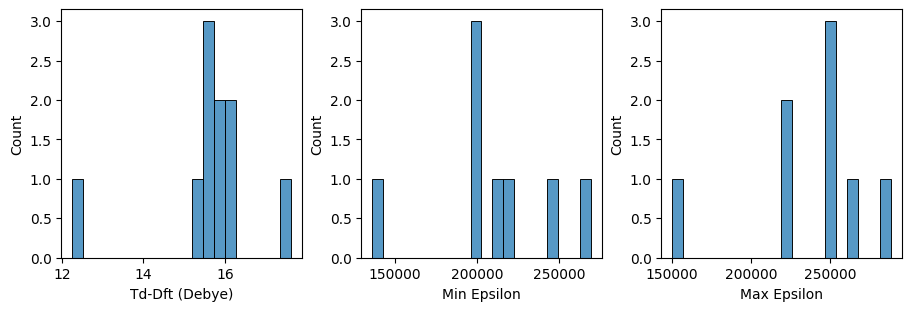

In [9]:
utils.ShowHistogramCharts(data)

## Saving for use later

In [10]:
utils.SaveDataToOutput(data, 'dataset-experimental')
utils.LoadDataFromOutput('dataset-experimental')

,Source Key,Td-Dft (Debye),Min Epsilon,Max Epsilon,Smiles
0,Cy3,12.25,136000.000,150000.0,CN4/C(=C/C=C/C2=[N+](C)c1ccccc1C2(C)C)C(C)(C)c...
1,Cy5-hex,16.22,200900.000,219800.0,CCCCCCOc1ccc4c(c1)C(C)(C)/C(=C\C=C\C=C\C3=[N+]...
2,Cy5-Peg,16.19,209500.000,221400.0,COCCOCCOCCOc1ccc4c(c1)C(C)(C)/C(=C\C=C\C=C\C3=...
3,Cy7,17.62,199000.000,250000.0,CN5/C(=C/C=C\3C=C(/C=C/C2=[N+](C)c1ccccc1C2(C)...
4,Cy5.5,15.57,198000.000,250000.0,CN4/C(=C/C=C/C=C/C3=[N+](C)c2ccc1ccccc1c2C3(C)...
5,Cy5-tBu,15.90,249300.000,261100.0,CN4/C(=C/C=C/C=C/C2=[N+](C)c1ccc(C(C)(C)C)cc1C...
6,Cy5,15.35,218810.982,250000.0,CN4/C(=C/C=C/C=C/C2=[N+](C)c1ccccc1C2(C)C)C(C)...
7,Cy5-Cl,15.74,269300.000,288400.0,CN4/C(=C/C=C/C=C/C2=[N+](C)c1ccc(Cl)cc1C2(C)C)...
8,Cy5-NMe2,15.83,NaN,NaN,CN(C)c1ccc4c(c1)C(C)(C)C(/C=C/C=C/C=C\3N(C)c2c...
9,Cy5-CN,15.66,NaN,NaN,CN4/C(=C/C=C/C=C/C2=[N+](C)c1ccccc1C2(C)C)C(C)...
